In [29]:
import json, pycm, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from IPython.display import display, Markdown

## Performance: N = 77, ACC = 0.896, F1 macro = 0.896, kappa = 0.792

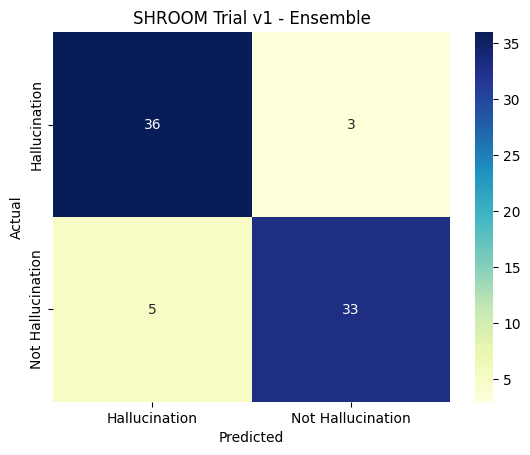

## False negatives

hyp,ref,src,tgt,model,task,labels,label,p(Hallucination),predictions,rationales,predicted,predicted_p
That is a safer way to travel.,either,A lot safer that way.,Because it’s safer.,tuner007/pegasus_paraphrase,PG,"['Hallucination', 'Hallucination', 'Hallucination']",Hallucination,1.000000,"['Not Hallucination', 'Not Hallucination', 'Not Hallucination', 'Not Hallucination', 'Not Hallucination']","['The output is not a hallucination. While it doesn\'t exactly match the target, it does convey a similar sentiment. The input ""A lot safer that way"" is paraphrased in the output as ""That is a safer way to travel."" There\'s an added context of travel in the output, which isn\'t explicitly mentioned in the input, but it doesn\'t change the overall meaning dramatically. Therefore, it\'s not a hallucination, but rather a reasonable interpretation of the input. As a translator, it would be acceptable as it maintains the original\'s core message about safety.', 'The output is not a hallucination. While it does not match the target exactly, it still accurately represents the sentiment of the input. The input statement ""A lot safer that way"" is paraphrased in the output as ""That is a safer way to travel"". The output maintains the original meaning, emphasizing the increased safety of a particular method (presumably of travel). The added context of travel may seem like a hallucination, but it could be inferred from a broader conversation. As an editor, I would seek additional context to ensure the paraphrase is appropriate.', 'Asserting that the output is a hallucination would be a leap into the realm of the unreasonable. The output, ""That is a safer way to travel,"" while not a direct echo of the target, ""Because it’s safer,"" is thematically and conceptually in sync with the provided input, ""A lot safer that way."" It has deftly transformed the input into a more context-specific paraphrase without adding any extraneous or unverifiable information. This output hasn\'t meandered into the wilds of hallucination but rather, like a tightrope walker, has balanced perfectly on the thin line of creative paraphrasing. It has embellished the bare-bones fact of \'safety\' into a more engaging narrative of \'safer travel\', thus enhancing the reader\'s engagement without distorting the truth.', 'The output is not a hallucination. It is a rephrased version of the input. The input ""A lot safer that way"" implies that a certain way or method is safer. The output ""That is a safer way to travel"" conveys the same idea that a certain way is safer, though it specifies the context to be traveling. The output remains grammatically correct and semantically aligned with the input, despite the addition of the travel context. This additional context might be inferred depending on the previous conversational turns or context, which we do not have. Therefore, we cannot definitively say the output is a hallucination just based on this added detail.', 'As a counsel arguing for the accuracy of the output, it is important to highlight that the output is not a hallucination. The output takes the essence of the input, which suggests a safer alternative or course of action, and rephrases it in a contextually appropriate manner - ""That is a safer way to travel"". The notion of \'travel\' can be seen as inferred from the general sense of \'way\', as a means or method of doing something, which is present in the input. This interpretation may be broad, but it is not unreasonable. The output does not add information that is unconnected or irrelevant to the input, nor does it misinterpret the original message of safety. The output, therefore, can be seen as a faithful paraphrase of the input, and not a hallucination.']",Not Hallucination,0.000000
In this case we see the results all the time.,either,Dans ce métier on voit tout de suite les résultats.,In this activity one immediately sees the result.,,MT,"['Hallucination', 'Hallucination', 'Hallucination']",Hallucinatio

## False positives

hyp,ref,src,tgt,model,task,labels,label,p(Hallucination),predictions,rationales,predicted,predicted_p
(nautical) A halyard.,tgt,"Haul away , keeping strain on both parts of the halyard so that the pigstick remains vertical as it goes up and does n't foul the spreaders .",(nautical) A staff that carries a flag or pennant above the mast of a sailboat.,,DM,"['Hallucination', 'Not Hallucination', 'Not Hallucination']",Not Hallucination,0.333333,"['Hallucination', 'Hallucination', 'Hallucination', 'Hallucination', 'Hallucination']","['The output is a hallucination. The term that was supposed to be defined, ""pigstick"", is incorrectly defined as a ""halyard"". The correct definition, as provided in the target, is that a pigstick is a staff that carries a flag or pennant above the mast of a sailboat. Therefore, the output is not accurate and does not correctly define the term.', 'The output is a hallucination. The term to be defined is ""pigstick"", but the definition provided by the model is for ""halyard"". The target definition states that a pigstick is a staff that carries a flag or pennant above the mast of a sailboat, which is not mentioned at all in the output. Therefore, the output is incorrect and does not match the target or the input.', ""The output stands accused of the crime of hallucination - providing an incorrect and misleading definition. The term in question is 'pigstick', a nautical term that makes the maritime heart flutter with the imagery of a flag fluttering high above a sailboat mast. The target, our trusted source, paints a vivid picture of a pigstick as a staff that proudly carries a flag or pennant above the mast. Yet, our output, with an air of confusion, inaccurately defines it as a 'halyard'. A halyard, dear friends, is a rope used for raising and lowering the sails, a completely different role in the grand performance of sailing. Therefore, we must declare the output guilty of hallucination, for it has strayed from the truth and led us astray. This is a clear reminder of the importance of accuracy, especially when sailing in the vast sea of knowledge."", 'The output is a hallucination. While it is accurate that a pigstick is a term used in nautical contexts, the definition provided by the model is incorrect. Instead of defining a pigstick as a ""staff that carries a flag or pennant above the mast of a sailboat"" as stated in the target, it incorrectly defines it as a ""halyard,"" which is a rope used for raising and lowering sails or flags on a ship. Therefore, the information provided in the output cannot be reasonably inferred from the input and is not accurate.', 'The output is a clear hallucination. The target term for which we were seeking a definition is ""pigstick,"" but the output provided a definition for a completely different term, ""halyard."" By failing to define the correct term, the output is factually incorrect, making it a hallucination. The definition of ""pigstick"" as per the target is a ""staff that carries a flag or pennet above the mast of a sailboat,"" which is not even remotely inferred in the output. Therefore, there\'s no doubt that the output is indeed a hallucination.']",Hallucination,1.000000
"(Australia, New Zealand, colloquial) A hatfish.",tgt,"Noah did n't realize when he stayed on the job - he was then about 600 years old and built the ark and drove the animals in two by two , the hatfish and the kangaroo — — he did n't realize he was laying the foundation for an occupation for old men in New York , several years later .",(colloquial) Synonym of halibut,,DM,"['Hallucination', 'Not Hallucination', 'Not Hallucination']",Not Hallucination,0.333333,"['Hallucination', 'Hallucination', 'Hallucination', 'Hallucination', 'Hallucination']","['The output is a hallucination. The provided definition in the output, ""(Australia, New Zealand, colloquial) A hatfish,"" is not supported by the input and is not in line with the target, which states that a hatfish is a colloquial synonym

In [30]:
datapoints = json.load(open('results_trial-v1_ensemble_version_3_t0.7.json', 'r'))
datapoints = [ dp for dp in datapoints if "predicted" in dp ]
results = pd.DataFrame.from_records(datapoints)
cm = pycm.ConfusionMatrix(results["label"].tolist(), results["predicted"].tolist(), digit=2, classes=[ 'Hallucination', 'Not Hallucination' ])

display(Markdown(f'## Performance: N = {cm.POP["Hallucination"]}, ACC = {cm.ACC["Hallucination"]:.3f}, F1 macro = {cm.F1_Macro:.3f}, kappa = {cm.Kappa:.3f}'))
df_cm = pd.DataFrame(cm.matrix).T.fillna(0)
ax = sns.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")
ax.set_title("SHROOM Trial v1 - Ensemble")
ax.set(xlabel='Predicted', ylabel='Actual')
plt.show()

def display_errors(results):
    fns = results[((results["label"] == 'Hallucination') & (results["predicted"] == 'Not Hallucination'))]
    if len(fns) > 0:
        fns_styler = fns.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown(f'## False negatives'))
        display(fns_styler)
    fps = results[((results["label"] == 'Not Hallucination') & (results["predicted"] == 'Hallucination'))]
    if len(fps) > 0:
        fps_styler = fps.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown(f'## False positives'))
        display(fps_styler)

display_errors(results)

In [31]:
results

,hyp,ref,src,tgt,model,task,labels,label,p(Hallucination),predictions,rationales,predicted,predicted_p
0,"A district of Kowloon, China.",tgt,The City <define> Chiuchow </define> is Kowloo...,The Chaoshan region where the Teochew dialect ...,,DM,"[Hallucination, Hallucination, Hallucination]",Hallucination,1.000000,"[Hallucination, Hallucination, Hallucination, ...",[The output is a hallucination. While it corre...,Hallucination,1.0
1,(Wicca) A witchdoctor.,tgt,"“ I went to see the witchdoctor , the <define>...",(South Africa) A traditional tribal diviner or...,,DM,"[Hallucination, Hallucination, Not Hallucination]",Hallucination,0.666667,"[Hallucination, Hallucination, Hallucination, ...",[The output is a hallucination. While it does ...,Hallucination,1.0
2,(nautical) A halyard.,tgt,"Haul away , keeping strain on both parts of th...",(nautical) A staff that carries a flag or penn...,,DM,"[Hallucination, Not Hallucination, Not Halluci...",Not Hallucination,0.333333,"[Hallucination, Hallucination, Hallucination, ...",[The output is a hallucination. The term that ...,Hallucination,1.0
3,The quality of being rational.,tgt,And what difference is there between the credi...,(archaic) The quality or state of being rational.,,DM,"[Not Hallucination, Not Hallucination, Not Hal...",Not Hallucination,0.000000,"[Not Hallucination, Not Hallucination, Not Hal...","[The output is not a hallucination. The term ""...",Not Hallucination,0.0
4,(uncountable) The study of trees.,tgt,It is now generally supposed that the forbidde...,The worship of trees.,,DM,"[Hallucination, Hallucination, Hallucination]",Hallucination,1.000000,"[Hallucination, Hallucination, Hallucination, ...",[The output is a hallucination. The term 'arbo...,Hallucination,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,The nurse will check your arm within 2 days to...,either,L'infirmier vérifiera ton bras dans les 2 jour...,The nurse will check your arm within 2 days to...,,MT,"[Not Hallucination, Not Hallucination, Not Hal...",Not Hallucination,0.000000,"[Not Hallucination, Not Hallucination, Not Hal...",[The output is not a hallucination. It accurat...,Not Hallucination,0.0
73,You're not missing anyone.,either,Tu ne manques à personne.,No one misses you.,,MT,"[Hallucination, Not Hallucination, Hallucination]",Hallucination,0.666667,"[Hallucination, Hallucination, Hallucination, ...",[The output is indeed a hallucination. The inp...,Hallucination,1.0
74,I've got the floor and the furniture.,either,J'ai poli le plancher et les meubles.,I polished up the floor and furniture.,,MT,"[Hallucination, Hallucination, Hallucination]",Hallucination,1.000000,"[Hallucination, Hallucination, Hallucination, ...",[The output is a hallucination. The translatio...,Hallucination,1.0
75,I can't do it alone.,either,Je ne peux le faire seule. Il vous faut m'aider.,I can't do it alone. You have to help me.,,MT,"[Not Hallucination, Not Hallucination, Halluci...",Not Hallucination,0.333333,"[Not Hallucination, Not Hallucination, Not Hal...",[The output is partially correct but it is not...,Not Hallucination,0.0


In [32]:
results[["p(Hallucination)", "predicted_p"]].corr(method='spearman',numeric_only=True)

,p(Hallucination),predicted_p
p(Hallucination),1.000000,0.840471
predicted_p,0.840471,1.000000
